In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
table = pd.read_csv(r'C:\Users\owner\projects\table_8.csv', encoding='ISO-8859-1')

In [3]:
fbi = table.drop([0, 1, 2, 3])
fbi.columns = ['City', 'Population', 'Violent_crime', 'Murder and nonnegligent manslaughter', 'Rape(revised definition)', 'Rape','Robbery', 'Aggrevated_assault', 'Property_crime', 'Buglary', 'Larceny_theft', 'Motor-vehicle theft', 'Arson', 'blank']

In [4]:
fbi_new= fbi.drop(columns = ['blank'])
fbi_new.head()

,City,Population,Violent_crime,Murder and nonnegligent manslaughter,Rape(revised definition),Rape,Robbery,Aggrevated_assault,Property_crime,Buglary,Larceny_theft,Motor-vehicle theft,Arson
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


In [5]:
fbi_new.dtypes

City                                    object
Population                              object
Violent_crime                           object
Murder and nonnegligent manslaughter    object
Rape(revised definition)                object
Rape                                    object
Robbery                                 object
Aggrevated_assault                      object
Property_crime                          object
Buglary                                 object
Larceny_theft                           object
Motor-vehicle theft                     object
Arson                                   object
dtype: object

In [6]:
# determined that the entire column is nan and dropped it
np.unique(fbi_new['Rape(revised definition)'])
fbi_new= fbi_new.drop(columns = ['Rape(revised definition)'])

In [7]:
fbi_new['Violent_crime'] = pd.to_numeric(fbi_new['Violent_crime'], errors='coerce')
fbi_new['Murder and nonnegligent manslaughter'] = pd.to_numeric(fbi_new['Murder and nonnegligent manslaughter'], errors='coerce')
fbi_new['Rape'] = pd.to_numeric(fbi_new['Rape'], errors='coerce')
fbi_new['Robbery'] = pd.to_numeric(fbi_new['Robbery'], errors='coerce')
fbi_new['Aggrevated_assault'] = pd.to_numeric(fbi_new['Aggrevated_assault'], errors='coerce')
fbi_new['Property_crime'] = pd.to_numeric(fbi_new['Property_crime'], errors='coerce')
fbi_new['Buglary'] = pd.to_numeric(fbi_new['Buglary'], errors='coerce')
fbi_new['Larceny_theft'] = pd.to_numeric(fbi_new['Larceny_theft'], errors='coerce')
fbi_new['Motor-vehicle theft'] = pd.to_numeric(fbi_new['Motor-vehicle theft'], errors='coerce')
fbi_new['Arson'] = pd.to_numeric(fbi_new['Arson'], errors='coerce')

In [8]:
fbi_new.dtypes

City                                     object
Population                               object
Violent_crime                           float64
Murder and nonnegligent manslaughter    float64
Rape                                    float64
Robbery                                 float64
Aggrevated_assault                      float64
Property_crime                          float64
Buglary                                 float64
Larceny_theft                           float64
Motor-vehicle theft                     float64
Arson                                   float64
dtype: object

In [9]:
#removing the commas
fbi_new.Population = fbi_new.Population.str.replace(',', '')

In [10]:
fbi_new['Population'] = pd.to_numeric(fbi_new['Population'], errors='coerce')

In [11]:
#remove the data that was falsely included in the dataframe

fbi_new = fbi_new[fbi_new.Population.isnull() ==False]

In [12]:
fbi_new.head()

,City,Population,Violent_crime,Murder and nonnegligent manslaughter,Rape,Robbery,Aggrevated_assault,Property_crime,Buglary,Larceny_theft,Motor-vehicle theft,Arson
4,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
5,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
6,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
7,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,NaN,705.0,NaN,142.0,NaN
8,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [13]:
fbi_new.rename(columns={'Murder and nonnegligent manslaughter':'Murder'}, inplace = True)

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


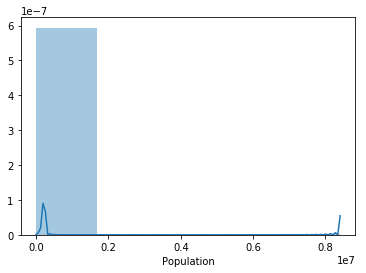

In [14]:
sns.distplot(fbi_new.Population, bins = 5)

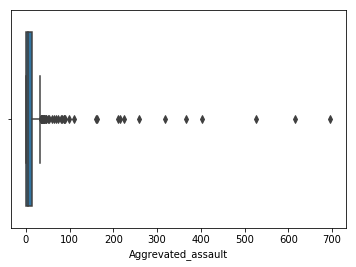

In [15]:
sns.boxplot(fbi_new.Aggrevated_assault)

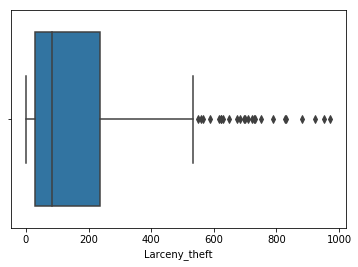

In [16]:
sns.boxplot(fbi_new.Larceny_theft)

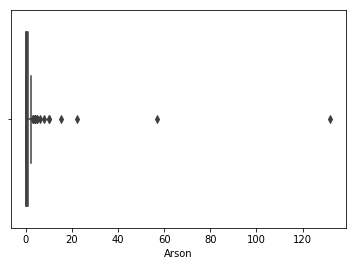

In [17]:
sns.boxplot(fbi_new.Arson)

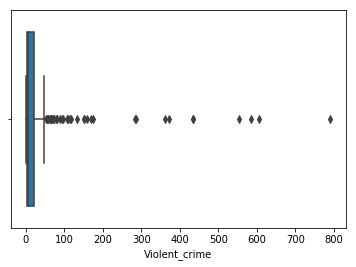

In [18]:
sns.boxplot(fbi_new.Violent_crime)

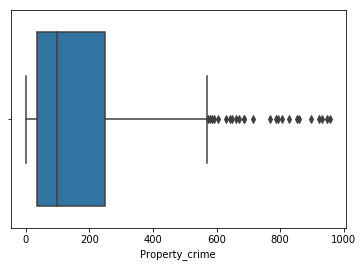

In [19]:
sns.boxplot(fbi_new.Property_crime)

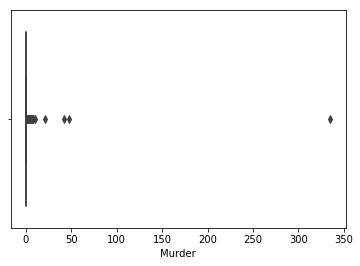

In [20]:
sns.boxplot(fbi_new.Murder)

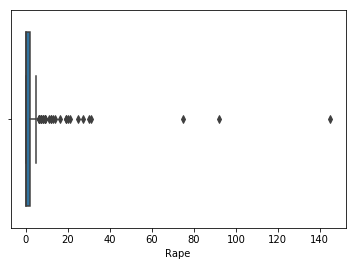

In [21]:
sns.boxplot(fbi_new.Rape)

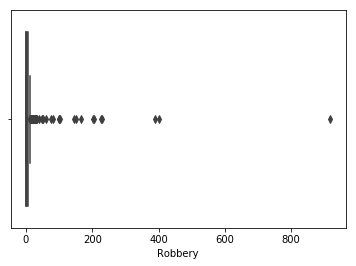

In [22]:
sns.boxplot(fbi_new.Robbery)

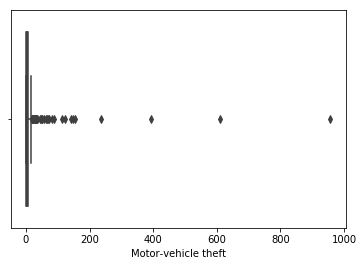

In [23]:
sns.boxplot(fbi_new['Motor-vehicle theft'])

In [24]:
#filled nans with the mean
fbi_new.fillna(fbi_new.mean(), inplace = True)

In [25]:
# removing outliers

fbi_new = fbi_new.loc[(fbi_new['Property_crime'] <=500)& (fbi_new['Aggrevated_assault'] <150) &(fbi_new['Larceny_theft'] <500)&(fbi_new['Arson'] <5) & (fbi_new['Violent_crime'] < 50) & (fbi_new['Murder'] <10) & (fbi_new['Rape'] <40) & (fbi_new['Robbery'] < 300) & (fbi_new['Motor-vehicle theft'] <200)]

In [26]:
fbi_new.head()

,City,Population,Violent_crime,Murder,Rape,Robbery,Aggrevated_assault,Property_crime,Buglary,Larceny_theft,Motor-vehicle theft,Arson
4,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.000000
5,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.000000
6,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.000000
8,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,1.871658
9,Alfred Village,4089.0,5.0,0.0,0.0,3.0,2.0,46.0,10.0,36.0,0.0,1.871658


In [27]:
#sns.distplot(fbi_new.Robbery, bins = 5)

In [28]:
features = pd.DataFrame(fbi_new.Population)
features['Population_sqrd'] = features['Population'] ** 2
features['Murder'] = np.where(fbi_new['Murder'] >0, 1,0) 
features['Robbery'] = np.where(fbi_new['Robbery'] >0, 1,0) 
features['Property_crime'] = fbi_new['Property_crime']

In [29]:
features.head()

,Population,Population_sqrd,Murder,Robbery,Property_crime
4,1861.0,3463321.0,0,0,12.0
5,2577.0,6640929.0,0,0,24.0
6,2846.0,8099716.0,0,0,16.0
8,6388.0,40806544.0,0,1,223.0
9,4089.0,16719921.0,0,1,46.0


In [30]:
fbi_new.corr()

,Population,Violent_crime,Murder,Rape,Robbery,Aggrevated_assault,Property_crime,Buglary,Larceny_theft,Motor-vehicle theft,Arson
Population,1.000000,0.570479,0.173548,0.276380,0.542224,0.520193,0.675508,0.629007,0.673162,0.592188,0.235481
Violent_crime,0.570479,1.000000,0.275321,0.614074,0.803402,0.959973,0.711833,0.789851,0.677817,0.582671,0.347714
Murder,0.173548,0.275321,1.000000,0.151498,0.208947,0.243015,0.118964,0.211191,0.103684,0.199480,0.111060
Rape,0.276380,0.614074,0.151498,1.000000,0.405577,0.531747,0.482428,0.564394,0.458381,0.344221,0.225212
Robbery,0.542224,0.803402,0.208947,0.405577,1.000000,0.622263,0.575565,0.693326,0.542420,0.617792,0.204013
Aggrevated_assault,0.520193,0.959973,0.243015,0.531747,0.622263,1.000000,0.676940,0.718796,0.647657,0.491313,0.366148
Property_crime,0.675508,0.711833,0.118964,0.482428,0.575565,0.676940,1.000000,0.799466,0.994223,0.548518,0.410014
Buglary,0.629007,0.789851,0.211191,0.564394,0.693326,0.718796,0.799466,1.000000,0.752834,0.586609,0.403399
Larceny_theft,0.673162,0.677817,0.103684,0.458381,0.542420,0.647657,0.994223,0.752834,1.000000,0.525725,0.397151
Motor-vehicle theft,0.592188,0.582671,0.199480,0.344221,0.617792,0.491313,0.548518,0.586609,0.525725,1.000000,0.247557


In [31]:
regr = linear_model.LinearRegression()
Y = features['Property_crime'].values.reshape(-1, 1)
X = features[['Population', 'Population_sqrd', 'Murder', 'Robbery']]
regr.fit(X, Y)

print('\nCoeffiicients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coeffiicients: 
 [[ 1.49300523e-02 -2.17249948e-07 -2.38747336e+01  8.19845499e+01]]

Intercept: 
 [-9.91974722]

R-squared:
0.6041194574973419


In [32]:
features_new = pd.DataFrame(fbi_new.Population)
features_new['Larceny_theft'] = fbi_new['Larceny_theft']
features_new['Buglary'] = fbi_new['Buglary']
features_new['Violent_crime'] = fbi_new['Violent_crime']
features_new['Property_crime'] = fbi_new['Property_crime']
features_new['Motor-vehicle theft'] = fbi_new['Motor-vehicle theft']
features_new['Arson'] = fbi_new['Arson']
features_new['Aggrevated_assault'] = fbi_new['Aggrevated_assault']
features_new['Rape'] = fbi_new['Rape']
features_new['Property_crime_sqrt'] =np.sqrt(features_new['Property_crime'])

In [33]:
features_new.head()

,Population,Larceny_theft,Buglary,Violent_crime,Property_crime,Motor-vehicle theft,Arson,Aggrevated_assault,Rape,Property_crime_sqrt
4,1861.0,10.0,2.0,0.0,12.0,0.0,0.000000,0.0,0.0,3.464102
5,2577.0,20.0,3.0,3.0,24.0,1.0,0.000000,3.0,0.0,4.898979
6,2846.0,15.0,1.0,3.0,16.0,0.0,0.000000,3.0,0.0,4.000000
8,6388.0,165.0,53.0,23.0,223.0,5.0,1.871658,16.0,3.0,14.933185
9,4089.0,36.0,10.0,5.0,46.0,0.0,1.871658,2.0,0.0,6.782330


In [62]:
features_new['Larceny_theft_sqrt'] = (features_new['Larceny_theft']+1) **0.5
#features_new['Buglary_sqrt'] = (features_new['Buglary'] +1)**0.7
features_new['Violent_crime_sqrt'] = (features_new['Violent_crime'] +1) **0.5
#features_new['Aggrevated_assault_sqrt'] = (features_new['Aggrevated_assault']+1)**0.5

In [63]:
Y_one = features_new['Property_crime'].values.reshape(-1, 1)
X_one = features_new[['Larceny_theft_sqrt', 'Violent_crime_sqrt']]
regr.fit(X_one, Y_one)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_one,Y_one))


Coefficients: 
 [[23.227281   3.7627443]]

Intercept: 
 [-92.07408871]

R-squared:
0.9375785897724994


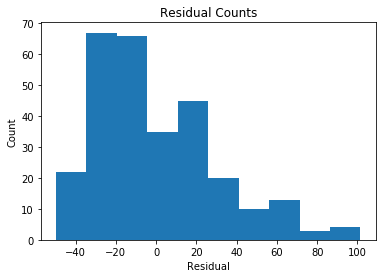

In [64]:
predicted = regr.predict(X_one).ravel()
actual= features_new['Property_crime']
predicted_sqrd = predicted ** 2
residual = actual - predicted

plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

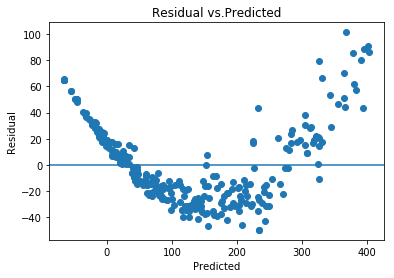

In [65]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs.Predicted')
plt.show()

In [66]:
r2_score(actual, predicted)

0.9375785897724994

In [39]:
correlation_matrix = X_one.corr()
display(correlation_matrix)

,Larceny_theft_sqrt,Violent_crime_sqrt
Larceny_theft_sqrt,1.000000,0.777559
Violent_crime_sqrt,0.777559,1.000000


In [40]:
linear_formula = 'Property_crime ~ Larceny_theft_sqrt+ Violent_crime_sqrt'

lm_new = smf.ols(formula=linear_formula, data = features_new).fit()

In [41]:
lm_new.params

Intercept            -89.534650
Larceny_theft_sqrt    24.602715
Violent_crime_sqrt    -3.031314
dtype: float64

In [42]:
lm_new.pvalues

Intercept              5.200592e-69
Larceny_theft_sqrt    1.952003e-122
Violent_crime_sqrt     2.492120e-01
dtype: float64

In [43]:
lm_new.rsquared

0.9370433268091934

In [44]:
lm_new.conf_int()

,0,1
Intercept,-96.976330,-82.092969
Larceny_theft_sqrt,23.439403,25.766028
Violent_crime_sqrt,-8.199014,2.136386


In [45]:
cross_val_score(regr, X_one, Y_one, cv=10)

array([0.92875057, 0.95174139, 0.91844612, 0.94214742, 0.92494729,
       0.9185173 , 0.93226487, 0.9219544 , 0.90412158, 0.92947251])

# NY 2014(different year)

In [46]:
new_table = pd.read_csv(r'C:\Users\owner\projects\table_8_2014.csv', encoding='ISO-8859-1')

In [47]:
new_table.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2014",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,NaN
4,Adams Village,"1,851",0,0,NaN,0,0,0,11,1,10,0,0,NaN


In [48]:
ny_2014 = new_table.drop([0, 1, 2, 3])
ny_2014.columns = ['City', 'Population', 'Violent_crime', 'Murder and nonnegligent manslaughter', 'Rape(revised definition)', 'Rape','Robbery', 'Aggrevated_assault', 'Property_crime', 'Buglary', 'Larceny_theft', 'Motor-vehicle theft', 'Arson', 'blank']

In [49]:
ny_2014.head()

,City,Population,Violent_crime,Murder and nonnegligent manslaughter,Rape(revised definition),Rape,Robbery,Aggrevated_assault,Property_crime,Buglary,Larceny_theft,Motor-vehicle theft,Arson,blank
4,Adams Village,"1,851",0,0,NaN,0,0,0,11,1,10,0,0,NaN
5,Addison Town and Village,"2,568",2,0,NaN,0,1,1,49,1,47,1,0,NaN
6,Afton Village4,820,0,0,0,NaN,0,0,1,0,1,0,0,NaN
7,Akron Village,"2,842",1,0,NaN,0,0,1,17,0,17,0,0,NaN
8,Albany4,"98,595",802,8,54,NaN,237,503,"3,888",683,"3,083",122,12,NaN


In [50]:
ny_2014= ny_2014.drop(columns = ['blank'])

In [51]:
#np.unique(cali['Rape(revised definition)'])
ny_2014= ny_2014.drop(columns = ['Rape(revised definition)'])

In [52]:
ny_2014['Violent_crime'] = pd.to_numeric(ny_2014['Violent_crime'], errors='coerce')
ny_2014['Property_crime'] = pd.to_numeric(ny_2014['Property_crime'], errors='coerce')
ny_2014['Larceny_theft'] = pd.to_numeric(ny_2014['Larceny_theft'], errors='coerce')

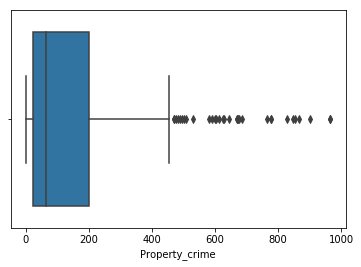

In [53]:
sns.boxplot(ny_2014['Property_crime'])

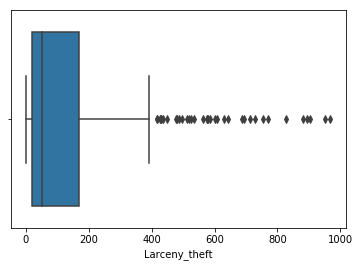

In [54]:
sns.boxplot(ny_2014['Larceny_theft'])

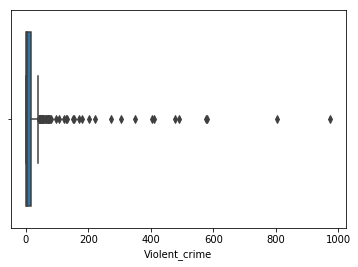

In [55]:
sns.boxplot(ny_2014['Violent_crime'])

In [56]:
#removing outliers
ny_2014 = ny_2014.loc[(ny_2014['Larceny_theft']<400) &(ny_2014['Property_crime'] <500)&(ny_2014['Violent_crime']<200)]

In [67]:
ny_2014['Larceny_theft_sqrt'] = (ny_2014['Larceny_theft']+1) **0.5
ny_2014['Violent_crime_sqrt'] = (ny_2014['Violent_crime'] +1) **0.5

In [68]:
ny_2014['Larceny_theft_sqrt'].fillna(ny_2014['Larceny_theft_sqrt'].median(), inplace = True)
ny_2014['Property_crime'].fillna(ny_2014['Property_crime'].median(), inplace = True)
ny_2014['Violent_crime_sqrt'].fillna(ny_2014['Violent_crime_sqrt'].median(), inplace = True)

In [69]:
X_ny_2014 = ny_2014[['Larceny_theft_sqrt', 'Violent_crime_sqrt']]
prediction = regr.predict(X_ny_2014)
Y_ny_2014 = ny_2014[['Property_crime']]

In [70]:
print(r2_score(Y_ny_2014, prediction))

0.9283182700534568


Different iterations were attempted:
 - Version with no outliers removed from the training dataset and from the test data set. Results were not satisfactory.
 - Buglary, aggrevated assualt, rape, robbery were tested as potential features and eventually eliminated after their p-values proved to be too high.
  - NY data for 2014 was selected because it seems to be a better candiate than 2013 data from a different state since our train data only included information about NY and no other states.
  - Various exponents for the existing features were tested and the best results were reached with square roots of both features(Larceny_theft and Violent_crime). 